In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EmoSense_2023/twitter_data.csv",error_bad_lines=False)


<ipython-input-4-c390033594dd>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/drive/MyDrive/EmoSense_2023/twitter_data.csv",error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [ ]:
# Drop unnecessary columns
df = df.drop(['ItemID', 'SentimentSource'], axis=1)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['SentimentText_clean']= df['SentimentText'].apply(lambda x:remove_punctuation(x))
df.head()

,Sentiment,SentimentText,SentimentText_clean
0,0,is so sad for my APL frie...,is so sad for my APL friend
1,0,I missed the New Moon trail...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT


In [ ]:
def remove_url(text):
    pattern = re.compile('https?://S+|www.S+')
    return pattern.sub(r'', text)


In [ ]:
df['SentimentText_clean'].apply(remove_url)

0                                is so sad for my APL friend
1                              I missed the New Moon trailer
2                                      omg its already 730 O
3                     Omgaga Im sooo  im gunna CRy Ive be...
4                   i think mi bf is cheating on me       TT
                                 ...                        
1578607                       Zzzzzz Finally Night tweeters 
1578608                           Zzzzzzz sleep well people 
1578609                  ZzzZzZzzzZ wait no I have homework 
1578610          ZzZzzzZZZZzzz meh what am I doing up again 
1578611                          Zzzzzzzzzzzzzzzzzzz I wish 
Name: SentimentText_clean, Length: 1578612, dtype: object

In [ ]:
df['SentimentText_clean'].str.lower()
df['SentimentText_clean'].apply(lambda x:x.lower())

0                                is so sad for my apl friend
1                              i missed the new moon trailer
2                                      omg its already 730 o
3                     omgaga im sooo  im gunna cry ive be...
4                   i think mi bf is cheating on me       tt
                                 ...                        
1578607                       zzzzzz finally night tweeters 
1578608                           zzzzzzz sleep well people 
1578609                  zzzzzzzzzz wait no i have homework 
1578610          zzzzzzzzzzzzz meh what am i doing up again 
1578611                          zzzzzzzzzzzzzzzzzzz i wish 
Name: SentimentText_clean, Length: 1578612, dtype: object

In [ ]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['SentimentText_clean']= df['SentimentText_clean'].apply(lambda x: tokenization(x))

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['no_stopwords']= df['SentimentText_clean'].apply(lambda x:remove_stopwords(x))

In [ ]:
df

,Sentiment,SentimentText,SentimentText_clean,no_stopwords
0,0,is so sad for my APL frie...,[ is so sad for my APL fri...,[ is so sad for my APL fri...
1,0,I missed the New Moon trail...,[ I missed the New Moon trai...,[ I missed the New Moon trai...
2,1,omg its already 7:30 :O,[ omg its already 730 O],[ omg its already 730 O]
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,[ Omgaga Im sooo im gunna CRy Ive b...,[ Omgaga Im sooo im gunna CRy Ive b...
4,0,i think mi bf is cheating on me!!! ...,[ i think mi bf is cheating on me ...,[ i think mi bf is cheating on me ...
...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,[Zzzzzz Finally Night tweeters ],[Zzzzzz Finally Night tweeters ]
1578608,1,"Zzzzzzz, sleep well people",[Zzzzzzz sleep well people ],[Zzzzzzz sleep well people ]
1578609,0,ZzzZzZzzzZ... wait no I have homework.,[ZzzZzZzzzZ wait no I have homework ],[ZzzZzZzzzZ wait no I have homework ]
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?",[ZzZzzzZZZZzzz meh what am I doing up again ],[ZzZzzzZZZZzzz meh what am I doing up again ]


In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
df['SentimentText_clean']=df['SentimentText_clean'].apply(lambda x: stemming(x))

In [ ]:
df.head()

,Sentiment,SentimentText,SentimentText_clean,no_stopwords
0,0,is so sad for my APL frie...,[ is so sad for my apl fri...,[ is so sad for my APL fri...
1,0,I missed the New Moon trail...,[ i missed the new moon trail],[ I missed the New Moon trai...
2,1,omg its already 7:30 :O,[ omg its already 730 o],[ omg its already 730 O]
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,[ omgaga im sooo im gunna cry ive b...,[ Omgaga Im sooo im gunna CRy Ive b...
4,0,i think mi bf is cheating on me!!! ...,[ i think mi bf is cheating on me ...,[ i think mi bf is cheating on me ...


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['SentimentText_clean']=df['no_stopwords'].apply(lambda x:lemmatizer(x))

In [ ]:
df

,Sentiment,SentimentText,SentimentText_clean,no_stopwords
0,0,is so sad for my APL frie...,[ is so sad for my APL fri...,[ is so sad for my APL fri...
1,0,I missed the New Moon trail...,[ I missed the New Moon trai...,[ I missed the New Moon trai...
2,1,omg its already 7:30 :O,[ omg its already 730 O],[ omg its already 730 O]
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,[ Omgaga Im sooo im gunna CRy Ive b...,[ Omgaga Im sooo im gunna CRy Ive b...
4,0,i think mi bf is cheating on me!!! ...,[ i think mi bf is cheating on me ...,[ i think mi bf is cheating on me ...
...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,[Zzzzzz Finally Night tweeters ],[Zzzzzz Finally Night tweeters ]
1578608,1,"Zzzzzzz, sleep well people",[Zzzzzzz sleep well people ],[Zzzzzzz sleep well people ]
1578609,0,ZzzZzZzzzZ... wait no I have homework.,[ZzzZzZzzzZ wait no I have homework ],[ZzzZzZzzzZ wait no I have homework ]
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?",[ZzZzzzZZZZzzz meh what am I doing up again ],[ZzZzzzZZZZzzz meh what am I doing up again ]


In [ ]:
#install wordcloud module
#ploting a wordcloud for all tweets
!pip install Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

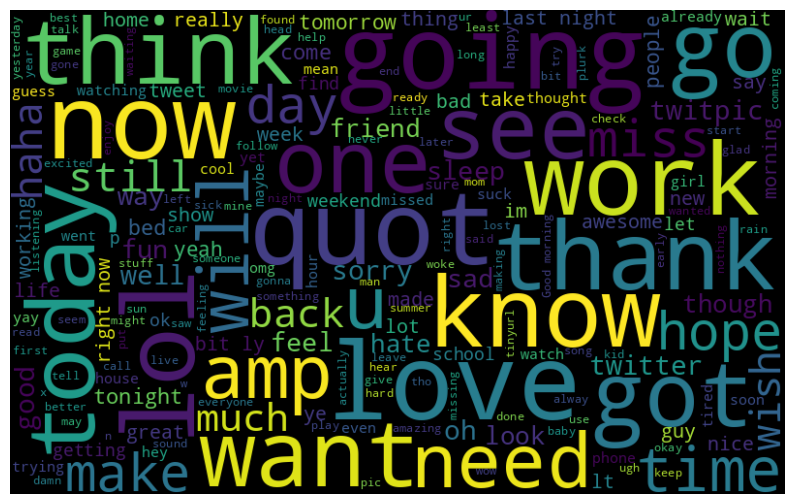

In [ ]:
all_words = ' '.join([text for text in df['SentimentText']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

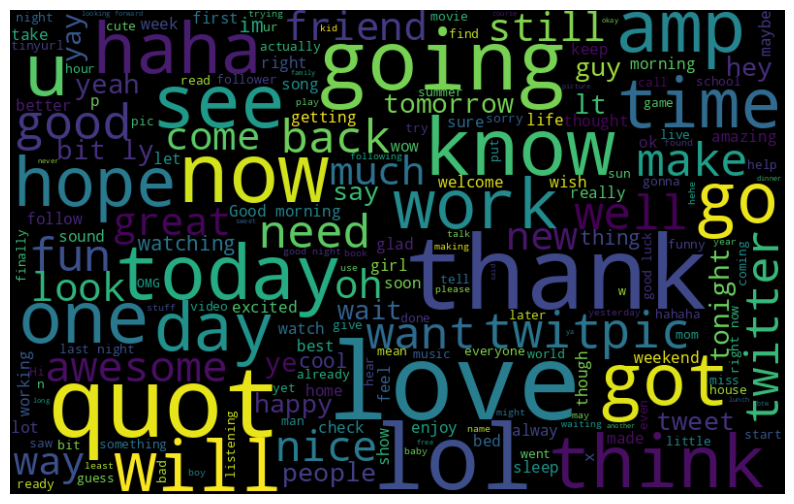

In [ ]:
positive_words = ' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

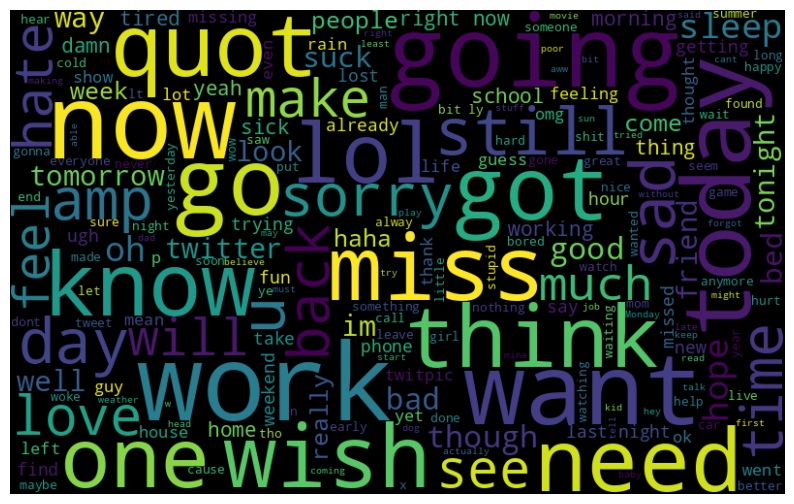

In [ ]:
negative_words = ' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_pos = df[df['Sentiment'] == 1]
df_neg = df[df['Sentiment'] == 0]

In [ ]:
df_pos.count()

Sentiment              790177
SentimentText          790177
SentimentText_clean    790177
no_stopwords           790177
dtype: int64

In [ ]:
df_neg.count()

Sentiment              788435
SentimentText          788435
SentimentText_clean    788435
no_stopwords           788435
dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='Sentiment', ylabel='count'>

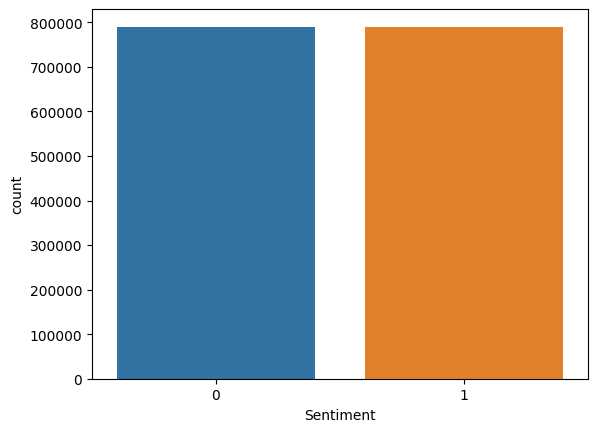

In [ ]:
sns.countplot(x=df['Sentiment'] ,data=df)

In [ ]:
df['lengths'] = df['SentimentText'].apply(len)

In [ ]:
df.head()

,Sentiment,SentimentText,SentimentText_clean,no_stopwords,lengths
0,0,is so sad for my APL frie...,[ is so sad for my APL fri...,[ is so sad for my APL fri...,61
1,0,I missed the New Moon trail...,[ I missed the New Moon trai...,[ I missed the New Moon trai...,51
2,1,omg its already 7:30 :O,[ omg its already 730 O],[ omg its already 730 O],37
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,[ Omgaga Im sooo im gunna CRy Ive b...,[ Omgaga Im sooo im gunna CRy Ive b...,132
4,0,i think mi bf is cheating on me!!! ...,[ i think mi bf is cheating on me ...,[ i think mi bf is cheating on me ...,53


In [ ]:
df['lengths'] = df['SentimentText'].apply(len)

## CHECKPOINT 2

In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [ ]:
# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
# tokenizer.fit_on_texts(df['SentimentText'])
# sequences = tokenizer.texts_to_sequences(df['SentimentText'])
# padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Sentiment'], test_size=0.3, random_state=42)


In [ ]:
# # Build the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# # Train the model
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.3)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.feature_extraction.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['SentimentText'], df['Sentiment'], test_size=0.3, random_state=42)


In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert text to sequences and pad them
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=20)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=20)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=20))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_seq, y_train, epochs=1, batch_size=32, validation_split=0.3)

24173/24173 [==============================] - 11821s 489ms/step - loss: 0.4256 - accuracy: 0.8025 - val_loss: 0.3997 - val_accuracy: 0.8168


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
print(f"Task 1 - Simple LSTM: Test Accuracy: {test_acc}")

14800/14800 [==============================] - 118s 8ms/step - loss: 0.3986 - accuracy: 0.8178
Task 1 - Simple LSTM: Test Accuracy: 0.817762017250061


In [50]:
# Task 2: Word2Vec embeddings
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train.apply(lambda x: x.split()), vector_size=32, window=5, min_count=1, workers=4)

In [ ]:
# Create Word2Vec embeddings matrix
embedding_matrix = word2vec_model.wv.vectors

In [58]:
import numpy as np

In [63]:
len(tokenizer.word_index) + 1

543791

In [65]:
# Create an embedding matrix
embedding_dim = 32
embedding_matrix = np.zeros((543791, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build LSTM model with Word2Vec embeddings
model_w2v = Sequential()
model_w2v.add(Embedding(
    input_dim=543791,  # Use the correct vocabulary size
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=20,
    trainable=False  # Set to True if you want to fine-tune embeddings
))
model_w2v.add(LSTM(100))
model_w2v.add(Dense(1, activation='sigmoid'))
model_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
# Train the model
history_w2v = model_w2v.fit(X_train_seq, y_train, epochs=1, batch_size=32, validation_split=0.3)

24173/24173 [==============================] - 535s 22ms/step - loss: 0.4440 - accuracy: 0.7908 - val_loss: 0.4235 - val_accuracy: 0.8037


In [67]:
# Evaluate the model on the test set
test_loss_w2v, test_acc_w2v = model_w2v.evaluate(X_test_seq, y_test)
print(f"Task 2 - LSTM with Word2Vec Embeddings: Test Accuracy: {test_acc_w2v}")

14800/14800 [==============================] - 151s 10ms/step - loss: 0.4217 - accuracy: 0.8052
Task 2 - LSTM with Word2Vec Embeddings: Test Accuracy: 0.8051686882972717


In [68]:
# Task 3: Logistic Regression
# Convert text to numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [69]:
# Build and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# Evaluate the Logistic Regression model on the test set
lr_predictions = lr_model.predict(X_test_tfidf)
lr_acc = accuracy_score(y_test, lr_predictions)
print(f"Task 3 - Logistic Regression: Test Accuracy: {lr_acc}")

Task 3 - Logistic Regression: Test Accuracy: 0.8021850400351364


In [72]:
# Task 4: Save predictions to CSV
# Use the trained model to get predictions on the entire dataset
all_sequences = pad_sequences(tokenizer.texts_to_sequences(df['SentimentText']), maxlen=20)
predictions = model.predict(all_sequences)

49332/49332 [==============================] - 409s 8ms/step


In [73]:
# Plot loss vs epoch and accuracy vs epoch for both methods
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

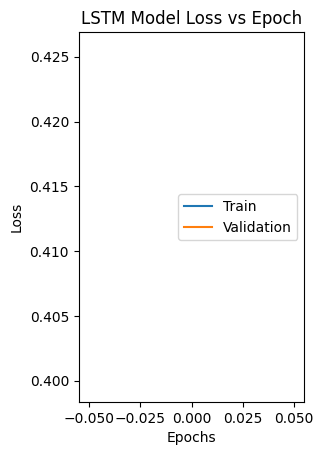

In [75]:
# LSTM Model
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('LSTM Model Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

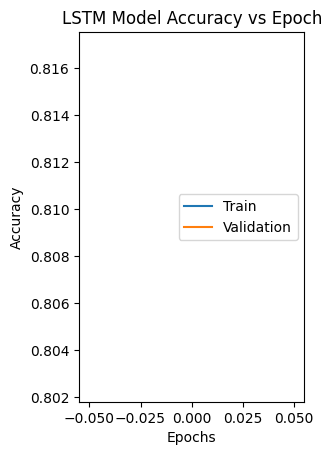

In [76]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('LSTM Model Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [77]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>